<a href="https://colab.research.google.com/github/jahelsantiago/waifu-net/blob/main/waifu_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.backend as K

# Introduction:

In anime (japanese animation)  the main characters present personality archetypes that are represented in drawn features and characteristics. For example a character called “tsundere” are represented for being cold, reserved, temperamental and sometimes even may be hostile, but with time, she will turns in a really  warm, sweet, kind and tender person. The general appearance of these anime characters are: innocent looking, angry faces, upset expressions and usually they have long hair.

![Sin%20t%C3%ADtulo2.png](attachment:Sin%20t%C3%ADtulo2.png)

The main objective of our project is to create a neural network that can classify a given image into their personality archetype. For example if we present the following image, the model should classify it as a tsundere.

![Sin%20t%C3%ADtulo.jpg](attachment:Sin%20t%C3%ADtulo.jpg)

For that pourpuse, we divided the main goal in the followings tasks:
* **Construction of waifus dere-type Database:** It is necessary to create a database with the main characters of every dere-type. 
* **Images Mining:** It is necessary to create our own images dataset because there is no one avalive of this topic on the internet. For that purpose we will mine 200 images for every waifu in the previously created database.
* **Data augmentation:** There are not enough images of this topic available for mining. So it is necessary to increase the data set for other methods.
* **Model construction:** It's necessary to create a model taking into account the small data set and the class imbalance presented in the dataset.

# Materials and methods


## Data:
The data set is composed by 7 classes w*hich are Yandere, Deredere, Dandere, Himedere, Yangire, Tsundere and Kuudere.* As you can see in table 1 you can see every representative of each class. Each class has between 15 and 30 main character  and for each character there are 200 images for a total of 15.000 images. The data was divided in two sets, the train, and the validation set  with 80%  and 20% of the data respectively.  

In [ ]:
pd.read_excel(r"../input/female-anime-characters-anime-dataset/Waifus.xlsx")

,Kundere,Tsundere,Yandere,Deredere,Dandere,Himedere,Yanguire
0,Rei Ayanami,Minatsu Shiina,Mizuki Himeji,Chiyo Sakura,Hinata Hyuga,Erina Nakiri,Kouha Ren
1,Mei Misaki,Aya Komichi,Konishi,Rinko Yamato,Sekiya Naru,Sena Kashiwazaki,Kureo Mado
2,Eucliwood Hellscythe,Michiru Kinushima,Kurenai Rin,Hotaru Ichijo,Tomoko Kuroki,Lilith Bristol,Akiko Yosano
3,Mashiro Shiina,Misato Tachibana,Belarus,"Kouko ""Roboko"" Kaga",Mio Akiyama,Ayano Kannagi,Seryu Ubiquitous
4,Homura Akemi,Nene Odagiri,Senjogahara Hitagi,"Meiko ""Menma"" Honma",Shiori Shiomiya,Haruhi Suzumiya,Nui Harime
5,Mikasa Ackerman,Lafiel Abriel,Hotogi Shirayuki,Ako Tamaki,Tadokoro Megumi,Beatrice,Shiro
6,Yin,Kagami Hiiragi,Akane Hiyama,Rikka Takanashi,Kosaki Onodera,Satsuki Kiryuin,Crona
7,Enma Ai,Emi Yusa,Kaede Fuyou,Chiho Sasaki,Kotomi Ichinose,Asuka Langley Soryu,Tsubaki Kasugano
8,Sakaki,Chris Yukine,Nadeko Sengoku,Elizabeth Midford,Nana Ebina,Cornelia Li Britannia,Nashetania Loei Piena Augustra
9,Saber,Ayano Sugiura,Anna Nishikinomiya,NaN,Yunyun,Ayeka,Euphemia li Britannia


In [ ]:
import os 
main_path = r"../input/female-anime-characters-anime-dataset/waifus_images/waifus_images_train"
paths = os.listdir(main_path)
dict_clases = {}
for path in paths:
  dict_clases[path] = [len(os.listdir(os.path.join(main_path, path)))]


df_classes = pd.DataFrame(dict_clases)  
df_classes.head()

,himedere,Kundere,Tsundere,Yangire,Dandere,Deredere,Yandere
0,1970,2023,2896,1078,1515,1595,2849


As you can see in the table, there are classes with more representantes so they have more data.

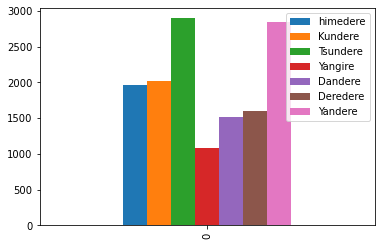

In [ ]:
df_classes.plot.bar()

Examples of the data set:

In [ ]:
pass

## Methods 

# Algorithm

import some general libraries and configure the GPU.

In [ ]:
import tensorflow as tf
import os

device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# define the path were the images are
train_dir = r"../input/female-anime-characters-anime-dataset/waifus_images/waifus_images_train"
val_dir = r"../input/female-anime-characters-anime-dataset/waifus_images/waifus_images_val"
class_names = os.listdir(main_path)
class_names

['himedere',
 'Kundere',
 'Tsundere',
 'Yangire',
 'Dandere',
 'Deredere',
 'Yandere']

In [ ]:
# define general variables
IMG_SIZE = 224
batch_size = 32
NUM_CLASSES = 7

In the next cell, we will provide data augmentation to our images and create and organize the data in a way that kereas can understand it. For the data augmentation purpose, we will use the module [Image data preprocessing](https://keras.io/api/preprocessing/image/#flowfromdataframe-method) . A useful module that allows us to create new images in base with the ones that we already have and control how to create the new one with parameters. 

In [ ]:
Train_Image_generator = ImageDataGenerator(
    rotation_range = 40, # Degree range for random rotations.
    width_shift_range=0.2,  # Randomly zoom inputs width in 20%.
    height_shift_range=0.2, # Randomly zoom inputs height in 20%.
    horizontal_flip = True, # Randomly flip inputs horizontally.
    rescale=1./255    
)

Test_Image_generator = ImageDataGenerator(    
    rescale=1./255
)


train_ds = Train_Image_generator.flow_from_directory(    
    directory=train_dir, #main directory where the images are
    target_size=(IMG_SIZE,IMG_SIZE), #desire size for the images
    class_mode="categorical",     
    shuffle=True,
    seed = 2)

test_ds = Test_Image_generator.flow_from_directory(    
    directory=val_dir, #main directory where the images are
    target_size=(IMG_SIZE,IMG_SIZE), #desire size for the images
    class_mode="categorical",     
    shuffle=True,
    seed = 2)

Found 13926 images belonging to 7 classes.
Found 2680 images belonging to 7 classes.


In the next cell we will create the architecture for our model.
we defined a sequential model structure wich means that the layers are organized like a stack, one over the other:
* The first layer is useed for resizing the size of the input image into a fixed size.
* The second layer is used for normalize the input image into a range between 0 and 1. 
* The next 6 layers are a combination betwen Convolutional layers and Pooling Layers
* The flaatten layer is used to reduce the dimension of the previus layer to 1 and this layer is conected with a fully conecte layer (Dense) with 128 units
* The Final layer is a fully coneceted layer with $n$ units, one for every class and is the output for our model.

In [ ]:
from tensorflow.keras import applications
from tensorflow.keras import layers

def build_model(num_classes):
    
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))       
    model = applications.EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")   
    
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
    return model

if the previus cell is the models skelton, this part is the model muscles.
First we used *[adam](http://https://arxiv.org/abs/1412.6980)* optimizer wich is one of the best optimizacion methods in machine learning.
loss....
Finally, the evaluation metrics is set to accuracy. A numerical value that provide use a general metric of the models peroformance.




In [ ]:
#with tf.device(r"/device:GPU:0"):
model = tf.keras.Sequential([     
  layers.Conv2D(16,(3,3),input_shape=(IMG_SIZE,IMG_SIZE,3),activation="relu"),    
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(7, activation="softmax")
])


optimizer = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
  optimizer= optimizer,
  loss="categorical_crossentropy",  
  metrics=['accuracy'])



Here we provide our [callbacks functions](https://keras.io/api/callbacks/), wich are usefull functions to control our model when in training time.

* The first one is ReduceLROnPlateau and is used to reduce the models learning rate when ther is no signifiaclly imporvemente in the selected metric after $n$ epochs.
* The second one is ModelCheckpoint and is used to create check points of our model.



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,  ReduceLROnPlateau, ModelCheckpoint


check_point = r"./weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"


my_callbacks = [  
  ReduceLROnPlateau(monitor="accuracy",factor=0.1,patience=3,min_delta=0.01),
  ModelCheckpoint(filepath=check_point,save_best_only=True),
  tf.keras.callbacks.EarlyStopping(patience=5)
]

Finaly we train the model for 30 epochs.

In [ ]:
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=50,
  callbacks= my_callbacks,  
)

Epoch 1/50
318/436 [====================>.........] - ETA: 58s - loss: 1.8736 - accuracy: 0.2356

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


436/436 [==============================] - 226s 519ms/step - loss: 1.8696 - accuracy: 0.2384 - val_loss: 1.8605 - val_accuracy: 0.2325
Epoch 2/50
436/436 [==============================] - 220s 504ms/step - loss: 1.8265 - accuracy: 0.2604 - val_loss: 1.8296 - val_accuracy: 0.2373
Epoch 3/50
436/436 [==============================] - 222s 510ms/step - loss: 1.8038 - accuracy: 0.2749 - val_loss: 1.8396 - val_accuracy: 0.2575
Epoch 4/50
436/436 [==============================] - 219s 502ms/step - loss: 1.7849 - accuracy: 0.2902 - val_loss: 1.8051 - val_accuracy: 0.2623
Epoch 5/50
436/436 [==============================] - 219s 501ms/step - loss: 1.7698 - accuracy: 0.2966 - val_loss: 1.7716 - val_accuracy: 0.2851
Epoch 6/50
436/436 [==============================] - 216s 496ms/step - loss: 1.7586 - accuracy: 0.3008 - val_loss: 1.7502 - val_accuracy: 0.2993
Epoch 7/50
436/436 [==============================] - 218s 501ms/step - loss: 1.7438 - accuracy: 0.3079 - val_loss: 1.7607 - val_accura

In [ ]:
print(K.eval(model.optimizer.lr))

1e-08


In the previous log console, you could see the training time of the model which is in average 170s per epoch. It is important to take into account that this model was trained using a GPU Nvidia Tesla k80 with 16gb of ram and a cpu intel xeon with 16 cores.

In the previous log console, you could see the training time of the model which is in average 170s per epoch. It is important to take into account that this model was trained using a GPU Nvidia Tesla k80 with 16gb of ram and a cpu intel xeon with 16 cores.

In the next cell you could see the loss and accuracy of the model after training.


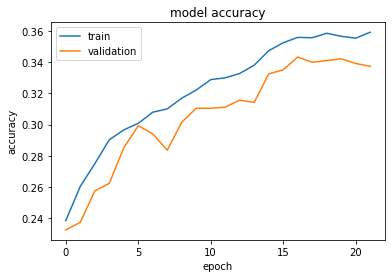

In [ ]:
import matplotlib.pyplot as plt



plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

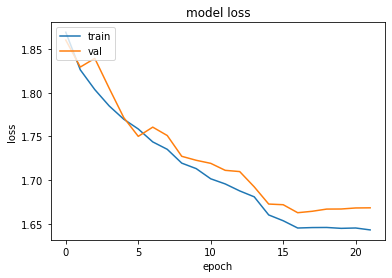

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Confusion matrix, without normalization
[[  6  43  97 113  59   3  50]
 [  6  29  65 111  61   2  59]
 [ 19  47  91 124  65   2  59]
 [ 12  43 124 158  81   2  81]
 [ 24  48 118 148  73   5  60]
 [  7  20  32  65  31   1  25]
 [ 11  42 108 136  58   2  54]]


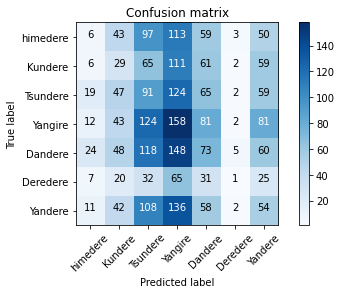

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
validation_generator = test_ds
classes = paths

Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, classes)
                        
                        
                        


As you can see the model didnt achive the desired performance so to improve this we will try with another approach using transfer learning from the $x-net$.
